# Southern Women Network Analysis
# Author: Ariba Mandavia
# Dataset Source: NetworkX Davis Club example
Objectives:
Explore bipartite network of women and events.

Identify central figures and event popularity.

Visualize community structures.

In [5]:


import networkx as nx
import matplotlib.pyplot as plt
from networkx.algorithms import bipartite
from networkx.algorithms import community

# Load the Davis Southern Women dataset
G = nx.davis_southern_women_graph()

# Basic Info
print("Number of nodes:", G.number_of_nodes())
print("Number of edges:", G.number_of_edges())

# Split nodes into women and events
women = [n for n, d in G.nodes(data=True) if d['bipartite'] == 0]
events = [n for n, d in G.nodes(data=True) if d['bipartite'] == 1]

print("Women:", women)
print("Events:", events)


Number of nodes: 32
Number of edges: 89
Women: ['Evelyn Jefferson', 'Laura Mandeville', 'Theresa Anderson', 'Brenda Rogers', 'Charlotte McDowd', 'Frances Anderson', 'Eleanor Nye', 'Pearl Oglethorpe', 'Ruth DeSand', 'Verne Sanderson', 'Myra Liddel', 'Katherina Rogers', 'Sylvia Avondale', 'Nora Fayette', 'Helen Lloyd', 'Dorothy Murchison', 'Olivia Carleton', 'Flora Price']
Events: ['E1', 'E2', 'E3', 'E4', 'E5', 'E6', 'E7', 'E8', 'E9', 'E10', 'E11', 'E12', 'E13', 'E14']


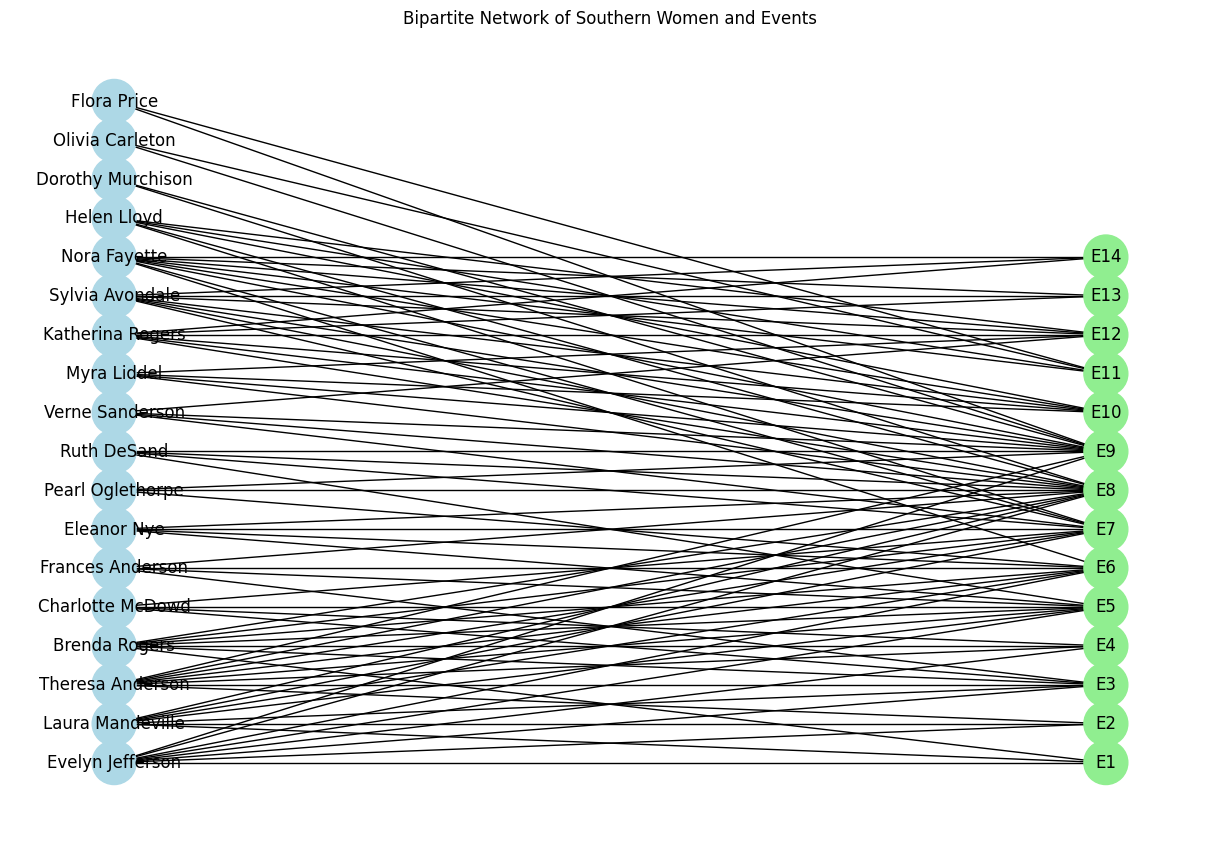

In [6]:
# Draw bipartite graph
pos = dict()
pos.update((node, (1, i)) for i, node in enumerate(women))
pos.update((node, (2, i)) for i, node in enumerate(events))

plt.figure(figsize=(12, 8))
nx.draw(G, pos, with_labels=True, node_color=['lightblue' if n in women else 'lightgreen' for n in G.nodes()], node_size=1000)
plt.title("Bipartite Network of Southern Women and Events")
plt.show()


In [7]:
# Centrality Measures
deg_centrality = nx.degree_centrality(G)

# Separate centralities
women_centrality = {n: c for n, c in deg_centrality.items() if n in women}
events_centrality = {n: c for n, c in deg_centrality.items() if n in events}

# Top 3 central women and events
top_women = sorted(women_centrality.items(), key=lambda x: x[1], reverse=True)[:3]
top_events = sorted(events_centrality.items(), key=lambda x: x[1], reverse=True)[:3]

print("Top 3 Women by Degree Centrality:", top_women)
print("Top 3 Events by Degree Centrality:", top_events)


Top 3 Women by Degree Centrality: [('Evelyn Jefferson', 0.25806451612903225), ('Theresa Anderson', 0.25806451612903225), ('Nora Fayette', 0.25806451612903225)]
Top 3 Events by Degree Centrality: [('E8', 0.45161290322580644), ('E9', 0.3870967741935484), ('E7', 0.3225806451612903)]


In [8]:
# Projected graph onto women
projected_women = bipartite.projected_graph(G, women)

# Community detection
communities = community.greedy_modularity_communities(projected_women)

# Print communities
for i, com in enumerate(communities):
    print(f"Community {i+1}: {list(com)}")


Community 1: ['Myra Liddel', 'Dorothy Murchison', 'Flora Price', 'Olivia Carleton', 'Ruth DeSand', 'Sylvia Avondale', 'Pearl Oglethorpe', 'Nora Fayette', 'Helen Lloyd', 'Katherina Rogers', 'Evelyn Jefferson', 'Theresa Anderson']
Community 2: ['Frances Anderson', 'Brenda Rogers', 'Eleanor Nye', 'Charlotte McDowd', 'Verne Sanderson', 'Laura Mandeville']


## Inference:

### 1. Relationships between Women:
- Women who attended many of the same events are more strongly connected in the projected graph.
- Community detection shows clusters of women with shared social circles.
- Some women, like Evelyn and Brenda, attend more events and act as central figures in their social group.

### 2. Relationships between Events:
- Events like "E8", "E9", and "E7" are the most popular, indicated by high degree centrality.
- These events serve as social hubs that connect many women across different communities.

This dataset effectively demonstrates how network analysis reveals social dynamics and clustering even from small historical datasets.
